In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(889, 12)

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [5]:
df.pop('Cabin')

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
884     NaN
885     B42
886     NaN
887    C148
888     NaN
Name: Cabin, Length: 889, dtype: object

In [6]:
df.shape

(889, 11)

<AxesSubplot:ylabel='Frequency'>

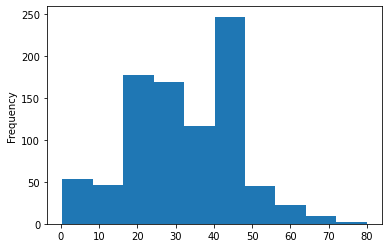

In [7]:
df['Age'].plot.hist()

In [8]:
df['Age'].fillna(df['Age'].mean(), inplace= True)

In [10]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
df["Embarked"].fillna(value='S',inplace=True)

In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [14]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.7+ KB


In [17]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

df["Sex"] = lab.fit_transform(df["Sex"])
df["Embarked"] = lab.fit_transform(df["Embarked"])

In [18]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


## KNN

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [20]:
def prediction(n):
    x = df.drop(['Pclass'],axis=1)
    y = df['Pclass']
    k = []
    s = []
    
    for i in range(1,n):
        knn = KNeighborsClassifier(n_neighbors = i)
        k.append(i)
        
        print("--------------------------------------------------------------------------------------")
        print(f"Here k value is {i}: ")
    
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.3, random_state=0)
        model = knn.fit(x_train,y_train)
        pred = model.predict(x_test)
        
        score = model.score(x_test,y_test)
        s.append(score)
    
        print(f"\nAcuuracy when k is {i} ", score)
        print(f"Confusion matrix when k is {i}  \n", confusion_matrix(y_test, pred))
        
    plt.plot(k,s)
    plt.xlabel("K value")
    plt.ylabel("Accuracy score")
    plt.title("Graph between k value of knn and Accuracy score")
    plt.show()

Enter The number of iteration you want for k: 300
--------------------------------------------------------------------------------------
Here k value is 1: 

Acuuracy when k is 1  0.8913857677902621
Confusion matrix when k is 1  
 [[ 62   6   2]
 [  3  37   9]
 [  1   8 139]]
--------------------------------------------------------------------------------------
Here k value is 2: 

Acuuracy when k is 2  0.8651685393258427
Confusion matrix when k is 2  
 [[ 67   2   1]
 [  8  37   4]
 [  4  17 127]]
--------------------------------------------------------------------------------------
Here k value is 3: 

Acuuracy when k is 3  0.8651685393258427
Confusion matrix when k is 3  
 [[ 63   5   2]
 [  7  28  14]
 [  3   5 140]]
--------------------------------------------------------------------------------------
Here k value is 4: 

Acuuracy when k is 4  0.8239700374531835
Confusion matrix when k is 4  
 [[ 61   7   2]
 [  8  30  11]
 [  4  15 129]]
------------------------------------------

Acuuracy when k is 38  0.7902621722846442
Confusion matrix when k is 38  
 [[ 62   5   3]
 [  7  23  19]
 [  9  13 126]]
--------------------------------------------------------------------------------------
Here k value is 39: 

Acuuracy when k is 39  0.7752808988764045
Confusion matrix when k is 39  
 [[ 61   5   4]
 [  7  19  23]
 [  9  12 127]]
--------------------------------------------------------------------------------------
Here k value is 40: 

Acuuracy when k is 40  0.7902621722846442
Confusion matrix when k is 40  
 [[ 62   5   3]
 [  7  20  22]
 [  7  12 129]]
--------------------------------------------------------------------------------------
Here k value is 41: 

Acuuracy when k is 41  0.7827715355805244
Confusion matrix when k is 41  
 [[ 61   5   4]
 [  7  19  23]
 [  7  12 129]]
--------------------------------------------------------------------------------------
Here k value is 42: 

Acuuracy when k is 42  0.7865168539325843
Confusion matrix when k is 42  
 [[ 61

Confusion matrix when k is 75  
 [[ 56   7   7]
 [  5  11  33]
 [  5   6 137]]
--------------------------------------------------------------------------------------
Here k value is 76: 

Acuuracy when k is 76  0.7677902621722846
Confusion matrix when k is 76  
 [[ 56   7   7]
 [  5  11  33]
 [  5   5 138]]
--------------------------------------------------------------------------------------
Here k value is 77: 

Acuuracy when k is 77  0.7715355805243446
Confusion matrix when k is 77  
 [[ 57   6   7]
 [  5  11  33]
 [  5   5 138]]
--------------------------------------------------------------------------------------
Here k value is 78: 

Acuuracy when k is 78  0.7640449438202247
Confusion matrix when k is 78  
 [[ 56   5   9]
 [  5  11  33]
 [  5   6 137]]
--------------------------------------------------------------------------------------
Here k value is 79: 

Acuuracy when k is 79  0.7565543071161048
Confusion matrix when k is 79  
 [[ 56   5   9]
 [  5  11  33]
 [  5   8 135]]
-


Acuuracy when k is 112  0.7453183520599251
Confusion matrix when k is 112  
 [[ 53   8   9]
 [  5  12  32]
 [  5   9 134]]
--------------------------------------------------------------------------------------
Here k value is 113: 

Acuuracy when k is 113  0.7490636704119851
Confusion matrix when k is 113  
 [[ 53   8   9]
 [  5  12  32]
 [  5   8 135]]
--------------------------------------------------------------------------------------
Here k value is 114: 

Acuuracy when k is 114  0.7490636704119851
Confusion matrix when k is 114  
 [[ 53   9   8]
 [  5  12  32]
 [  5   8 135]]
--------------------------------------------------------------------------------------
Here k value is 115: 

Acuuracy when k is 115  0.7490636704119851
Confusion matrix when k is 115  
 [[ 53  11   6]
 [  5  12  32]
 [  5   8 135]]
--------------------------------------------------------------------------------------
Here k value is 116: 

Acuuracy when k is 116  0.7490636704119851
Confusion matrix when k 


Acuuracy when k is 148  0.7677902621722846
Confusion matrix when k is 148  
 [[ 52  11   7]
 [  5  11  33]
 [  5   1 142]]
--------------------------------------------------------------------------------------
Here k value is 149: 

Acuuracy when k is 149  0.7677902621722846
Confusion matrix when k is 149  
 [[ 52  11   7]
 [  5  11  33]
 [  5   1 142]]
--------------------------------------------------------------------------------------
Here k value is 150: 

Acuuracy when k is 150  0.7677902621722846
Confusion matrix when k is 150  
 [[ 52  11   7]
 [  5  11  33]
 [  5   1 142]]
--------------------------------------------------------------------------------------
Here k value is 151: 

Acuuracy when k is 151  0.7677902621722846
Confusion matrix when k is 151  
 [[ 52  11   7]
 [  5  11  33]
 [  5   1 142]]
--------------------------------------------------------------------------------------
Here k value is 152: 

Acuuracy when k is 152  0.7640449438202247
Confusion matrix when k 


Acuuracy when k is 186  0.7490636704119851
Confusion matrix when k is 186  
 [[ 51   5  14]
 [  5   6  38]
 [  5   0 143]]
--------------------------------------------------------------------------------------
Here k value is 187: 

Acuuracy when k is 187  0.7490636704119851
Confusion matrix when k is 187  
 [[ 51   5  14]
 [  5   6  38]
 [  5   0 143]]
--------------------------------------------------------------------------------------
Here k value is 188: 

Acuuracy when k is 188  0.7490636704119851
Confusion matrix when k is 188  
 [[ 51   5  14]
 [  5   6  38]
 [  5   0 143]]
--------------------------------------------------------------------------------------
Here k value is 189: 

Acuuracy when k is 189  0.7453183520599251
Confusion matrix when k is 189  
 [[ 50   5  15]
 [  5   6  38]
 [  5   0 143]]
--------------------------------------------------------------------------------------
Here k value is 190: 

Acuuracy when k is 190  0.7415730337078652
Confusion matrix when k 


Acuuracy when k is 223  0.7228464419475655
Confusion matrix when k is 223  
 [[ 48   2  20]
 [  4   2  43]
 [  5   0 143]]
--------------------------------------------------------------------------------------
Here k value is 224: 

Acuuracy when k is 224  0.7228464419475655
Confusion matrix when k is 224  
 [[ 48   2  20]
 [  4   2  43]
 [  5   0 143]]
--------------------------------------------------------------------------------------
Here k value is 225: 

Acuuracy when k is 225  0.7228464419475655
Confusion matrix when k is 225  
 [[ 48   2  20]
 [  4   2  43]
 [  5   0 143]]
--------------------------------------------------------------------------------------
Here k value is 226: 

Acuuracy when k is 226  0.7228464419475655
Confusion matrix when k is 226  
 [[ 48   2  20]
 [  4   2  43]
 [  5   0 143]]
--------------------------------------------------------------------------------------
Here k value is 227: 

Acuuracy when k is 227  0.7228464419475655
Confusion matrix when k 

Confusion matrix when k is 260  
 [[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]
--------------------------------------------------------------------------------------
Here k value is 261: 

Acuuracy when k is 261  0.7191011235955056
Confusion matrix when k is 261  
 [[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]
--------------------------------------------------------------------------------------
Here k value is 262: 

Acuuracy when k is 262  0.7191011235955056
Confusion matrix when k is 262  
 [[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]
--------------------------------------------------------------------------------------
Here k value is 263: 

Acuuracy when k is 263  0.7191011235955056
Confusion matrix when k is 263  
 [[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]
--------------------------------------------------------------------------------------
Here k value is 264: 

Acuuracy when k is 264  0.7191011235955056
Confusion matrix when k is 264  
 [[ 48   0  22]
 [  4   1  44]
 [  


Acuuracy when k is 297  0.7078651685393258
Confusion matrix when k is 297  
 [[ 46   0  24]
 [  4   0  45]
 [  5   0 143]]
--------------------------------------------------------------------------------------
Here k value is 298: 

Acuuracy when k is 298  0.704119850187266
Confusion matrix when k is 298  
 [[ 45   0  25]
 [  4   0  45]
 [  5   0 143]]
--------------------------------------------------------------------------------------
Here k value is 299: 

Acuuracy when k is 299  0.704119850187266
Confusion matrix when k is 299  
 [[ 45   0  25]
 [  4   0  45]
 [  5   0 143]]


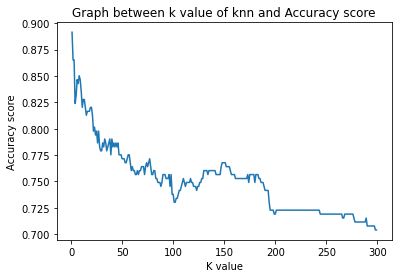

In [21]:
num = int(input('Enter The number of iteration you want for k: '))
prediction(num)